In [16]:
#Import libraries , read data frame , show and describe..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('./survey-results-public.csv')



df.describe() # describes the dataset


,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [17]:
# I want to see row counts , I want to see column counts
df.shape


(51392, 154)

In [28]:
# Prepare to data ;
#(only professional developer job seeking by country) 
onlyprof_jobseeking_bycountry = df.dropna(subset=['Professional', 'Country','JobSeekingStatus'], how='any') # Dropping rows with missing values in 'Professional', 'Country', and 'JobSeekingStatus' columns
onlyprof_jobseeking_bycountry # show dataframe 

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
5,6,Student,"Yes, both",New Zealand,"Yes, full-time","Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Disagree,NaN,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51385,51386,Used to be a professional developer,"Yes, both",United Kingdom,No,Employed full-time,Master's degree,A business discipline,A few days each month,"1,000 to 4,999 employees",...,Somewhat agree,Female,High school,White or of European descent,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN
51390,51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,Never,Fewer than 10 employees,...,Disagree,Male,A bachelor's degree,White or of European descent,Disagree,Agree,Disagree,Strongly agree,40000.0,NaN


In [22]:
# Prepare to data ;
# I want to check 'Each Professional Counts'
status_professional=df['Professional'].value_counts()
status_professional

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

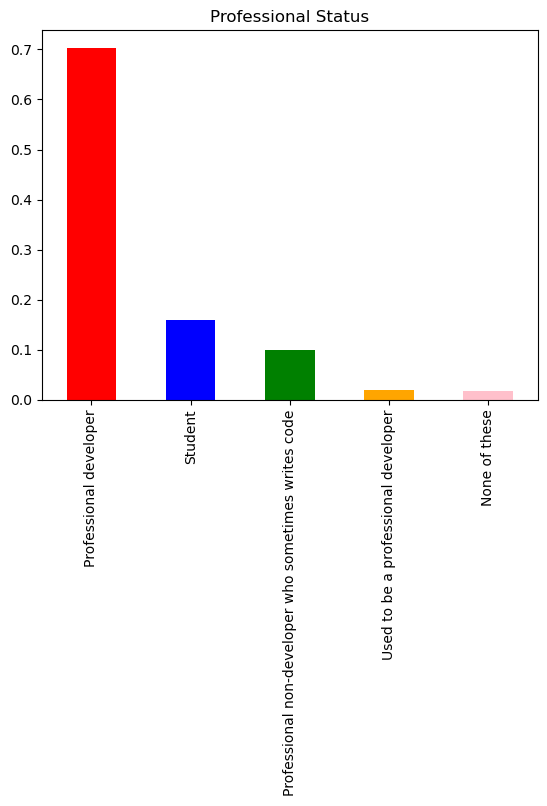

In [30]:
#it could be better if we see the 'Professionals in chart' 
colors = ['red', 'blue', 'green', 'orange','pink']
(status_professional/df.shape[0]).plot(kind="bar",color=colors);
plt.title("Professional Status");

 #Now we can start to analyse the dataset..

In [32]:
#In which countries do professional developers tend to change jobs more?
professional_devs = onlyprof_jobseeking_bycountry[onlyprof_jobseeking_bycountry["Professional"] == "Professional developer"]

professional_devs

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
13,14,Professional developer,"Yes, both",Germany,No,Employed full-time,Some college/university study without earning ...,Computer science or software engineering,"Less than half the time, but at least one day ...",Fewer than 10 employees,...,Disagree,Female,A master's degree,Hispanic or Latino/Latina,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51383,51384,Professional developer,"Yes, I program as a hobby",Sweden,No,"Independent contractor, freelancer, or self-em...",I never completed any formal education,NaN,All or almost all the time (I'm full-time remote),NaN,...,Strongly disagree,Male,"Some college/university study, no bachelor's d...",White or of European descent,Agree,Somewhat agree,Strongly disagree,Disagree,NaN,NaN
51384,51385,Professional developer,No,United States,No,Employed full-time,Bachelor's degree,Computer programming or Web development,Never,20 to 99 employees,...,Disagree,Male,A master's degree,White or of European descent,Somewhat agree,Agree,Disagree,Somewhat agree,NaN,NaN
51386,51387,Professional developer,"Yes, both",Romania,No,Employed full-time,Some college/university study without earning ...,Something else,It's complicated,100 to 499 employees,...,Somewhat agree,Male,High school,White or of European descent,Agree,Agree,Disagree,Somewhat agree,NaN,NaN
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Disagree,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN


In [33]:
# Create a new DataFrame 'professional_devs_cat' by selecting specific columns ('Country' and 'JobSeekingStatus')
# from the 'professional_devs' DataFrame. We use the 'copy()' method to ensure that we have an independent copy
# of the selected columns without modifying the original DataFrame.
professional_devs_category = professional_devs[['Country', 'JobSeekingStatus']].copy()
professional_devs_category

,Country,JobSeekingStatus
7,Poland,"I'm not actively looking, but I am open to new..."
8,Colombia,I am not interested in new job opportunities
9,France,"I'm not actively looking, but I am open to new..."
13,Germany,I am actively looking for a job
15,United States,"I'm not actively looking, but I am open to new..."
...,...,...
51383,Sweden,"I'm not actively looking, but I am open to new..."
51384,United States,"I'm not actively looking, but I am open to new..."
51386,Romania,"I'm not actively looking, but I am open to new..."
51387,United States,I am actively looking for a job


In [8]:
# Calculate the count of each unique combination of 'JobSeekingStatus' and 'Country' in the 'professional_devs_category' DataFrame.
status_Country=professional_devs_category.value_counts() 
status_Country

Country                         JobSeekingStatus                                            
United States                   I'm not actively looking, but I am open to new opportunities    3500
                                I am not interested in new job opportunities                    1739
United Kingdom                  I'm not actively looking, but I am open to new opportunities    1322
India                           I'm not actively looking, but I am open to new opportunities    1262
Germany                         I'm not actively looking, but I am open to new opportunities    1074
                                                                                                ... 
Gabon                           I'm not actively looking, but I am open to new opportunities       1
Georgia                         I am actively looking for a job                                    1
Rwanda                          I am not interested in new job opportunities                       

In [35]:
# Filter the 'professional_devs_category' DataFrame to select rows where the 'JobSeekingStatus' is 'I am actively looking for a job'.
actively_status = professional_devs_category[professional_devs_category['JobSeekingStatus'] == 'I am actively looking for a job']
actively_status

,Country,JobSeekingStatus
13,Germany,I am actively looking for a job
57,Italy,I am actively looking for a job
66,India,I am actively looking for a job
70,United States,I am actively looking for a job
83,United States,I am actively looking for a job
...,...,...
51356,Portugal,I am actively looking for a job
51368,Taiwan,I am actively looking for a job
51373,United States,I am actively looking for a job
51382,France,I am actively looking for a job


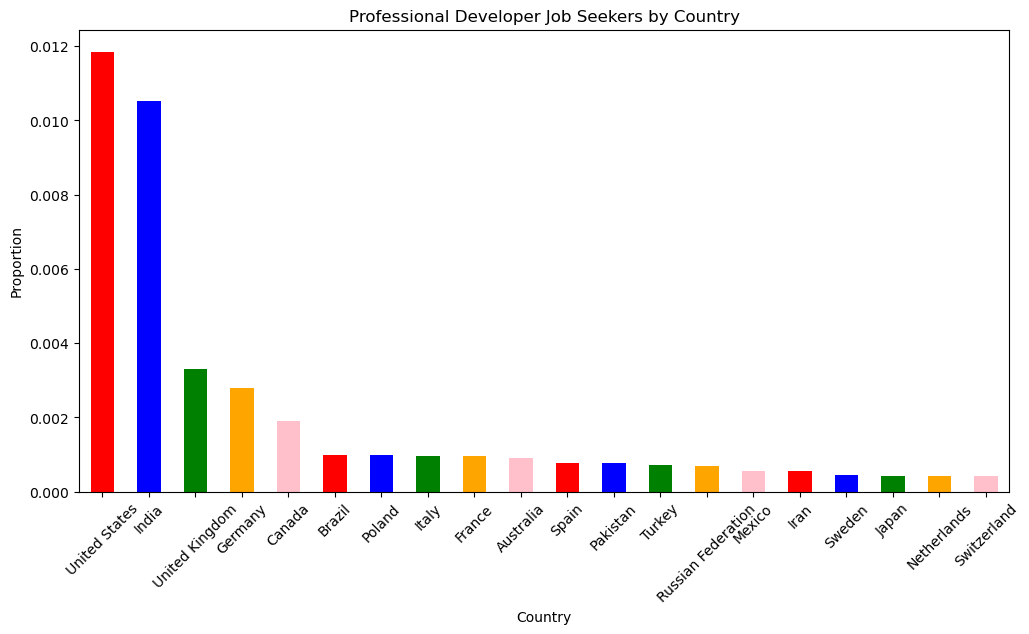

In [36]:

country_counts = actively_status['Country'].value_counts() # Calculate the count of job seekers actively looking for a job in each country.

range_by_country=(country_counts[:20]/df.shape[0]) # Calculate the relative frequency of the top 20 countries in the 'country_counts' DataFrame
# by dividing their counts by the total number of records in the original 'df' DataFrame. 

plt.figure(figsize=(12, 6))
(country_counts[:20]/df.shape[0]).plot(kind='bar',color=colors)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.title('Professional Developer Job Seekers by Country')
plt.xticks(rotation=45)
plt.show()

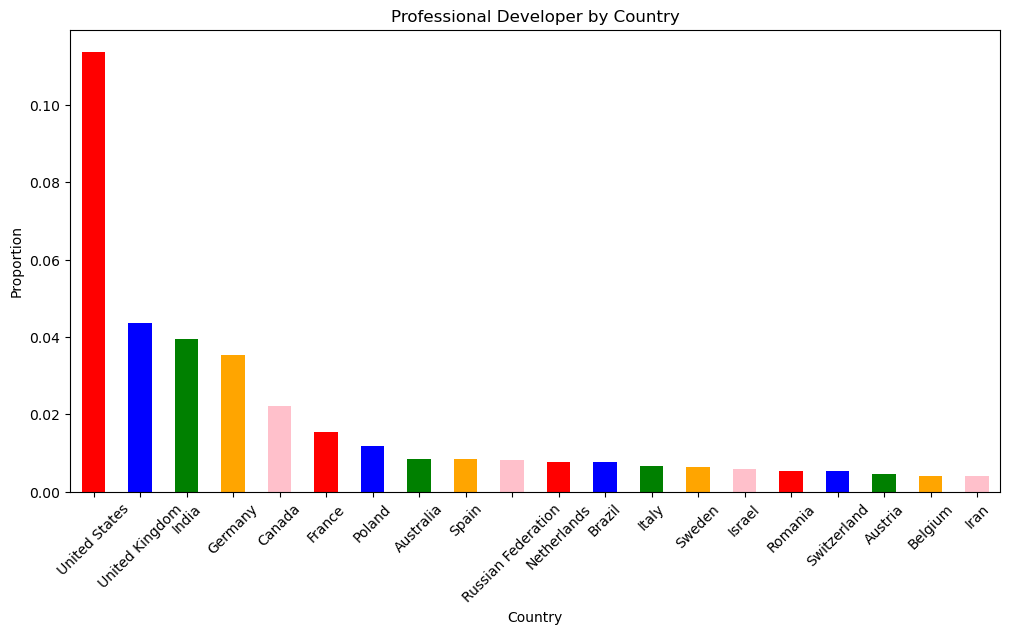

In [37]:

professional_counts = professional_devs['Country'].value_counts() # Calculate the count of professional developers in each country.

range_prof_by_country=(professional_counts[:20]/df.shape[0]) # Calculate the relative frequency of the top 20 countries with the highest number of professional developers 

plt.figure(figsize=(12, 6))
(professional_counts[:20]/df.shape[0]).plot(kind='bar',color=colors)
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.title('Professional Developer by Country')
plt.xticks(rotation=45)
plt.show()

In [38]:
comp_df = pd.merge(range_prof_by_country, range_by_country, left_index=True, right_index=True)
comp_df.columns = ['Professional_Developer', 'Profes_Dev_ActiveJobSeekers']
comp_df['Range'] = comp_df['Profes_Dev_ActiveJobSeekers'] / comp_df['Professional_Developer']
comp_df.style.bar(subset=['Range'], align='mid', color=['#d65f5f', '#5fba7d'])

,Professional_Developer,Profes_Dev_ActiveJobSeekers,Range
United States,0.113792,0.011850,0.104138
United Kingdom,0.043684,0.003308,0.075724
India,0.039442,0.010507,0.266404
Germany,0.035258,0.002802,0.079470
Canada,0.022066,0.001907,0.086420
France,0.015489,0.000953,0.061558
Poland,0.011870,0.000973,0.081967
Australia,0.008503,0.000915,0.107551
Spain,0.008406,0.000778,0.092593
Russian Federation,0.008211,0.000681,0.082938


In [39]:
#Let's remove #null characters
dropna_language=df.dropna(subset=['HaveWorkedLanguage'])



In [94]:
#count_programming_languages 
from collections import defaultdict

def count_programming_languages(dataframe, column_name):
    
    '''count programming languages in each line'''
     '''parameters : dataframe , column_name '''
    
    combined_list = []
    
    for row in dataframe[column_name]:
        combined_list.extend(row.split(";"))
    
    programming_languages = defaultdict(int)
    
    for language in combined_list:
        programming_languages[language.strip()] += 1
        
     '''return : programming_languages '''    
    
    return programming_languages

result = count_programming_languages(dropna_language, 'HaveWorkedLanguage')

for language, count in result.items():
    print(language, ":", count)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

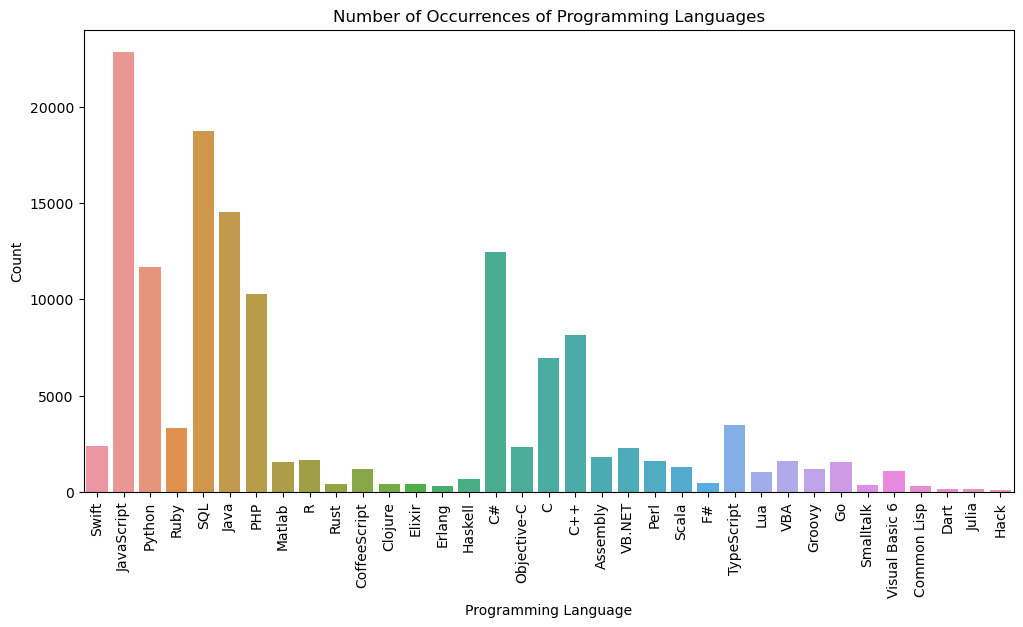

In [41]:
# Convert dictionary data to DataFrame
data = {'Programming Language': list(result.keys()), 'Count': list(result.values())}
df_plot = pd.DataFrame(data)

# Histogram of Number of Occurrences of Programming Languages
plt.figure(figsize=(12, 6))
sns.barplot(x='Programming Language', y='Count', data=df_plot)
plt.xticks(rotation=90)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.title('Number of Occurrences of Programming Languages')
plt.show()

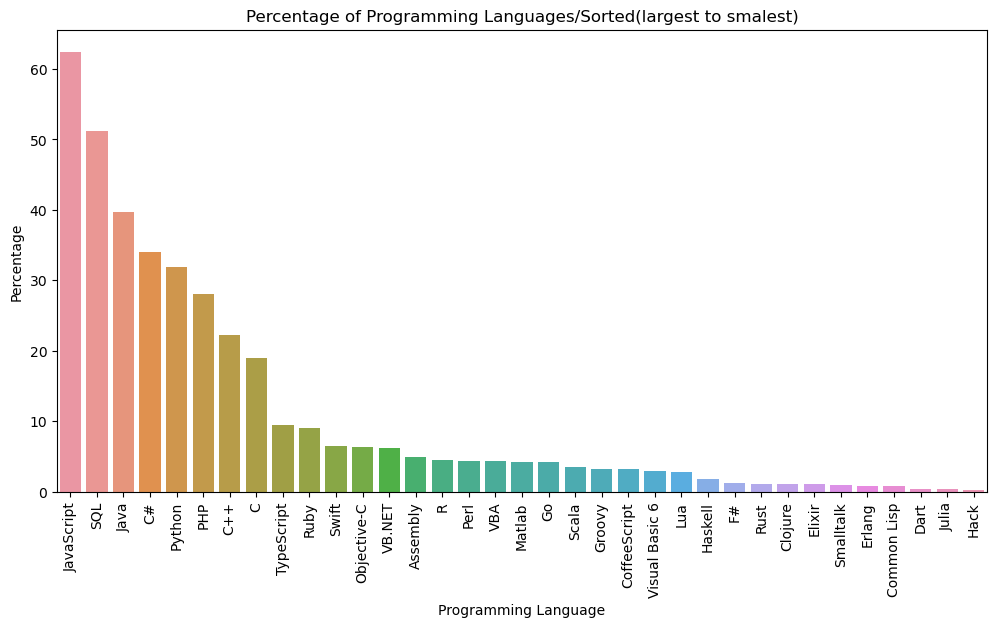

In [42]:
# percentage calculation:
total_count = dropna_language['HaveWorkedLanguage'].shape[0]
df_plot['Percentage'] = df_plot['Count'] / total_count * 100
df_plot = df_plot.sort_values(by='Count', ascending=False)

# Graphic drawing : 
plt.figure(figsize=(12, 6))
sns.barplot(x='Programming Language', y='Percentage', data=df_plot)
plt.xticks(rotation=90)
plt.xlabel('Programming Language')
plt.ylabel('Percentage')
plt.title('Percentage of Programming Languages/Sorted(largest to smalest)')
plt.show()


In [43]:
#delete null values

dropna_salary=df.dropna(subset=['Salary'])


In [44]:
# Salary and HaveWorkedLanguage remove null values
Language_salaries = dropna_salary[['Salary', 'HaveWorkedLanguage']]
Language_salaries = Language_salaries.dropna(subset=['HaveWorkedLanguage'])
Language_salaries

,Salary,HaveWorkedLanguage
2,113750.000000,Java; PHP; Python
14,100000.000000,Assembly; C; C++
17,130000.000000,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift
22,100764.000000,Java
25,175000.000000,Java; Scala
...,...,...
51371,74193.548387,Go; JavaScript; Python
51378,107526.881720,JavaScript; Objective-C; Python; Swift
51382,32258.064516,C#; JavaScript; TypeScript
51387,58000.000000,C#; JavaScript; Python; SQL; VB.NET; VBA


In [45]:
# we will look the first letter of comments for salaries : 


# Let's define the function that will get the first element
def get_first_element(text):
    elements = text.split(";")
    if len(elements) > 0:
        first_element = elements[0].strip()
        return first_element
    else:
        return ""

# HaveWorkedLanguage sütununa fonksiyonu uygulayalım ve sütunu güncelleyelim
Language_salaries['HaveWorkedLanguage'] = Language_salaries['HaveWorkedLanguage'].apply(get_first_element)

# Güncellenmiş DataFrame'i yazdıralım
print(Language_salaries)

              Salary HaveWorkedLanguage
2      113750.000000               Java
14     100000.000000           Assembly
17     130000.000000                  C
22     100764.000000               Java
25     175000.000000               Java
...              ...                ...
51371   74193.548387                 Go
51378  107526.881720         JavaScript
51382   32258.064516                 C#
51387   58000.000000                 C#
51390   40000.000000         JavaScript

[12128 rows x 2 columns]


In [47]:
#max salary : 
#Calculate maximum according to programming languages
max_salary = Language_salaries.groupby('HaveWorkedLanguage')['Salary'].max().sort_values(ascending=False)
max_salary

HaveWorkedLanguage
Java              197000.0
C#                195000.0
Python            195000.0
C                 195000.0
JavaScript        195000.0
C++               194000.0
F#                193750.0
CoffeeScript      190000.0
Assembly          180000.0
Clojure           180000.0
Ruby              180000.0
Objective-C       180000.0
Erlang            180000.0
Groovy            180000.0
Go                175000.0
Scala             174000.0
Smalltalk         160000.0
Swift             160000.0
Haskell           160000.0
SQL               156000.0
Perl              150000.0
Elixir            145000.0
Hack              140000.0
PHP               140000.0
Matlab            135000.0
VBA               135000.0
Lua               131000.0
Common Lisp       130000.0
Rust              130000.0
Julia             120000.0
R                 120000.0
Dart              115000.0
Visual Basic 6     97000.0
VB.NET             67000.0
Name: Salary, dtype: float64

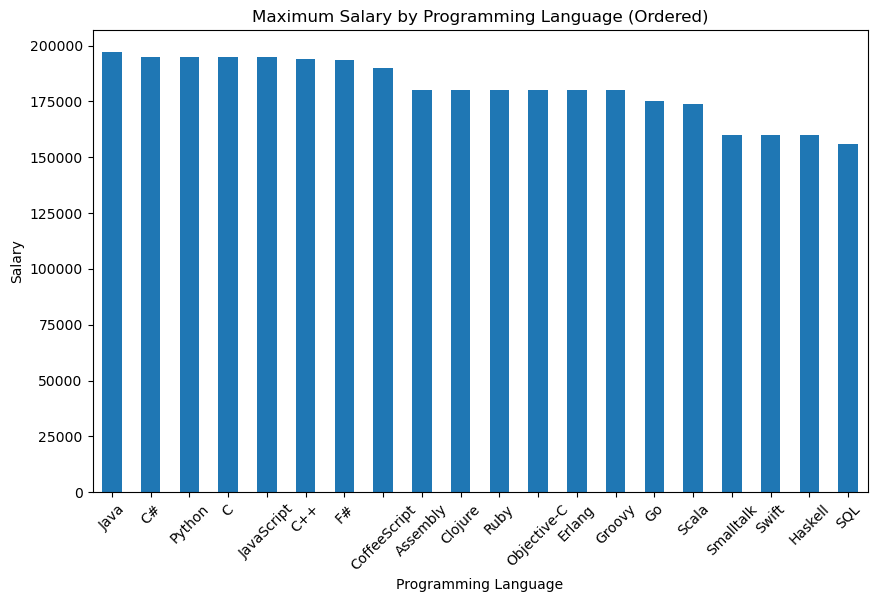

In [48]:
# max. graphic 

plt.figure(figsize=(10, 6))
max_salary[:20].plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Salary')
plt.title('Maximum Salary by Programming Language (Ordered)')
plt.xticks(rotation=45)
plt.show()



In [49]:
#average salary : 
# Calculate average salary by programming languages
avg_salary = Language_salaries.groupby('HaveWorkedLanguage').mean()['Salary'].sort_values(ascending=False)
avg_salary

HaveWorkedLanguage
Visual Basic 6    97000.000000
Smalltalk         89801.039932
Rust              81489.084392
Scala             81413.239848
Common Lisp       80984.779170
VBA               77659.434992
Clojure           77431.707353
Go                72182.654379
Hack              71163.215928
Lua               68038.123167
Groovy            64094.061880
CoffeeScript      63958.133671
Perl              62975.385551
R                 62455.023261
Python            62211.033762
F#                61361.721401
C++               61129.890746
Ruby              60739.968880
SQL               60150.401203
C#                59264.896879
Julia             57054.035067
C                 56491.637603
Erlang            56483.252973
Assembly          54449.536221
Haskell           54229.970399
Elixir            53121.392329
Java              53034.495132
VB.NET            52854.838710
Dart              52691.504150
JavaScript        51768.093188
Objective-C       51396.205486
Swift             50

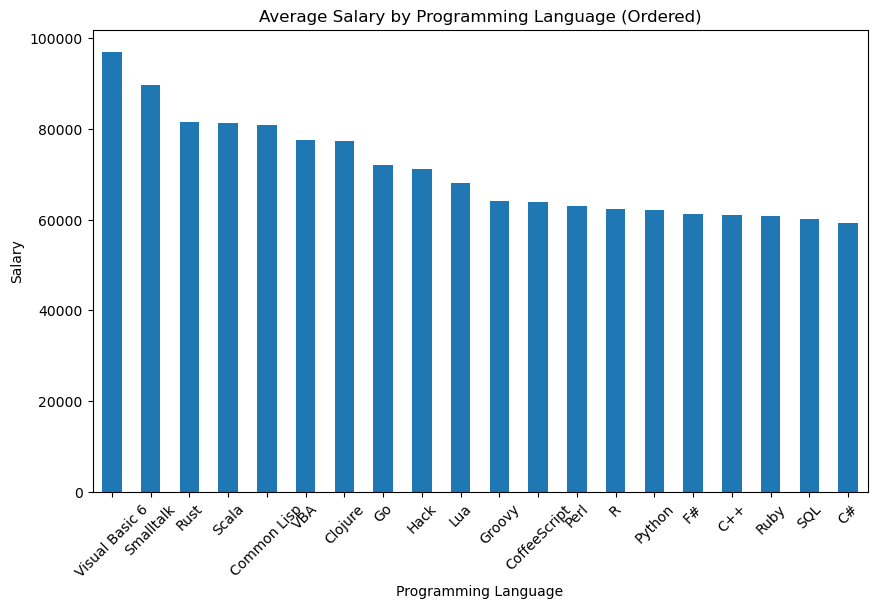

In [92]:

# Drawing Average Salary by Programming Language (Ordered) Graphic 
plt.figure(figsize=(10, 6))
avg_salary[:20].plot(kind='bar')
plt.xlabel('Programming Language')
plt.ylabel('Salary')
plt.title('Average Salary by Programming Language (Ordered)')
plt.xticks(rotation=45)
plt.show()



In [51]:
# company size - Language :
company_languages = df[['HaveWorkedLanguage', 'CompanySize']].dropna() #split into subsets and remove nulls.
company_languages

,HaveWorkedLanguage,CompanySize
1,JavaScript; Python; Ruby; SQL,20 to 99 employees
2,Java; PHP; Python,"10,000 or more employees"
3,Matlab; Python; R; SQL,"10,000 or more employees"
6,Matlab; Python,20 to 99 employees
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,Fewer than 10 employees
...,...,...
51386,C++; C#; Java; JavaScript; PHP; SQL,100 to 499 employees
51387,C#; JavaScript; Python; SQL; VB.NET; VBA,100 to 499 employees
51388,Java; SQL,100 to 499 employees
51390,JavaScript; PHP; Swift,Fewer than 10 employees


In [52]:
# group answers by company size'
cat_company=company_languages.value_counts()


In [53]:
# call function and use get_first_element method  :
company_languages['HaveWorkedLanguage'] = company_languages['HaveWorkedLanguage'].apply(get_first_element)
company_languages

,HaveWorkedLanguage,CompanySize
1,JavaScript,20 to 99 employees
2,Java,"10,000 or more employees"
3,Matlab,"10,000 or more employees"
6,Matlab,20 to 99 employees
7,CoffeeScript,Fewer than 10 employees
...,...,...
51386,C++,100 to 499 employees
51387,C#,100 to 499 employees
51388,Java,100 to 499 employees
51390,JavaScript,Fewer than 10 employees


Top 10 Programming Languages Among Professionals in Companies with 20 to 99 employees:
C#              26.760784
JavaScript      18.572549
Java            15.529412
C               11.372549
C++              8.925490
Assembly         3.560784
CoffeeScript     2.274510
Python           2.180392
Go               1.835294
Groovy           1.694118
Name: HaveWorkedLanguage, dtype: float64


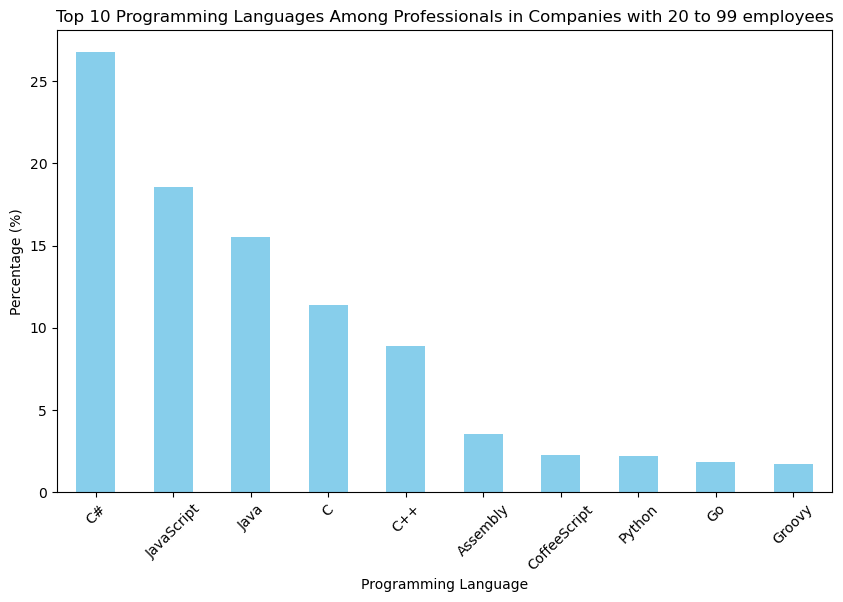

In [91]:
# Filter the DataFrame to select rows where 'CompanySize' is '20 to 99 employees employees'.
employees_20_to_99 = company_languages[company_languages['CompanySize'] == '20 to 99 employees']

# Extract the 'HaveWorkedLanguage' column from the filtered DataFrame.
languages_worked_20_to_99 = employees_20_to_99['HaveWorkedLanguage']

# Count the number of professionals who have worked with each programming language.
language_counts_20_to_99 = languages_worked.value_counts()

# Calculate the total number of respondents in this company size category.
total_respondents_20_to_99 = len(employees_20_to_99)

# Calculate the percentage of professionals who have worked with each language in this category.
language_percentages_20_to_99 = (language_counts_20_to_99 / total_respondents_20_to_99) * 100

# Display the top programming languages and their respective percentages in this company size category.
top_languages_20_to_99 = language_percentages_20_to_99.head(10)

# Print the results for analysis.
print("Top 10 Programming Languages Among Professionals in Companies with 20 to 99 employees:")
print(top_languages_20_to_99)

plt.figure(figsize=(10, 6))
top_languages_20_to_99.plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages Among Professionals in Companies with 20 to 99 employees')
plt.xlabel('Programming Language')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

Top 10 Programming Languages Among Professionals in Companies with 100 to 499 employees:
C#              30.461763
Java            16.919146
JavaScript      13.852893
C               11.589706
C++              8.724220
Assembly         3.157510
Python           2.463953
CoffeeScript     2.007666
Groovy           1.971163
Go               1.587881
Name: HaveWorkedLanguage, dtype: float64


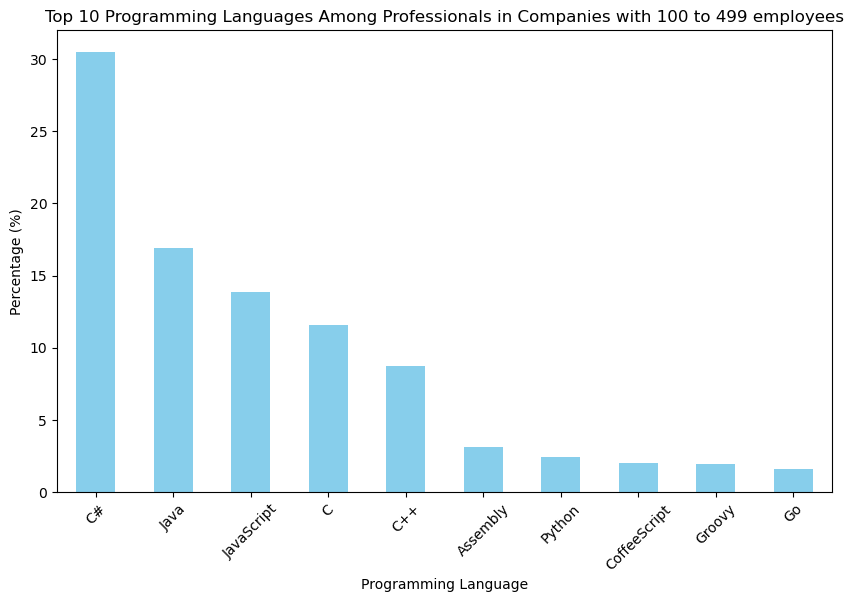

In [90]:
# Filter the DataFrame to select rows where 'CompanySize' is '100 to 499 employees'.
employees_100_to_500 = company_languages[company_languages['CompanySize'] == '100 to 499 employees']

# Extract the 'HaveWorkedLanguage' column from the filtered DataFrame.
languages_worked_100_to_500 = employees_100_to_500['HaveWorkedLanguage']

# Count the number of professionals who have worked with each programming language.
language_counts_100_to_500 = languages_worked_100_to_500.value_counts()

# Calculate the total number of respondents in this company size category.
total_respondents_100_to_500 = len(employees_100_to_500)

# Calculate the percentage of professionals who have worked with each language in this category.
language_percentages_100_to_500 = (language_counts_100_to_500 / total_respondents_100_to_500) * 100

# Display the top programming languages and their respective percentages in this company size category.
top_languages_100_to_500 = language_percentages_100_to_500.head(10)

# Print the results for analysis.
print("Top 10 Programming Languages Among Professionals in Companies with 100 to 499 employees:")
print(top_languages_100_to_500)

plt.figure(figsize=(10, 6))
top_languages_100_to_500.plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages Among Professionals in Companies with 100 to 499 employees')
plt.xlabel('Programming Language')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

Top 10 Programming Languages Among Professionals in Companies with 1,000 to 4,999 Employees:
C#              28.305143
Java            18.363825
C               13.427684
JavaScript      11.149465
C++              9.906800
Assembly         3.520884
Groovy           2.692440
Python           2.381774
Go               1.415257
CoffeeScript     1.311702
Name: HaveWorkedLanguage, dtype: float64


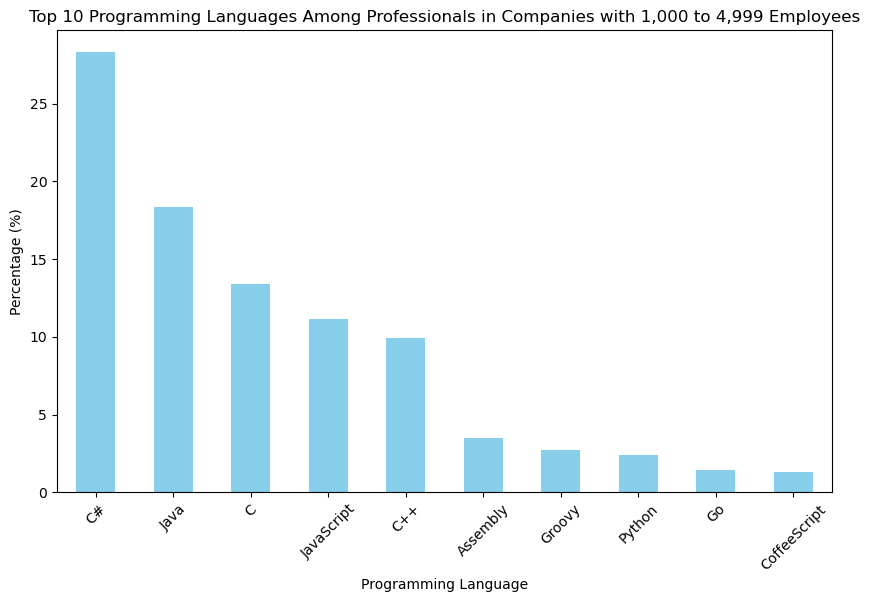

In [89]:
# Filter the DataFrame to select rows where 'CompanySize' is '1,000 to 4,999 employees'.
employees_1k_to_5k = company_languages[company_languages['CompanySize'] == '1,000 to 4,999 employees']

# Extract the 'HaveWorkedLanguage' column from the filtered DataFrame.
languages_worked_1k_to_5k = employees_1k_to_5k['HaveWorkedLanguage']

# Count the number of professionals who have worked with each programming language.
language_counts_1k_to_5k = languages_worked_1k_to_5k.value_counts()

# Calculate the total number of respondents in this company size category.
total_respondents_1k_to_5k = len(employees_1k_to_5k)

# Calculate the percentage of professionals who have worked with each language in this category.
language_percentages_1k_to_5k = (language_counts_1k_to_5k / total_respondents_1k_to_5k) * 100

# Display the top programming languages and their respective percentages in this company size category.
top_languages_1k_to_5k = language_percentages_1k_to_5k.head(10)

# Print the results for analysis.
print("Top 10 Programming Languages Among Professionals in Companies with 1,000 to 4,999 Employees:")
print(top_languages_1k_to_5k)

plt.figure(figsize=(10, 6))
top_languages_1k_to_5k.plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages Among Professionals in Companies with 1,000 to 4,999 Employees')
plt.xlabel('Programming Language')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

Top 10 Programming Languages Among Professionals in Companies with 10,000 or more employees:
C#            22.827125
Java          20.773639
C             16.571156
C++           10.792741
JavaScript     8.906399
Assembly       4.823305
Python         3.247373
Groovy         2.578797
Go             1.599809
SQL            1.504298
Name: HaveWorkedLanguage, dtype: float64


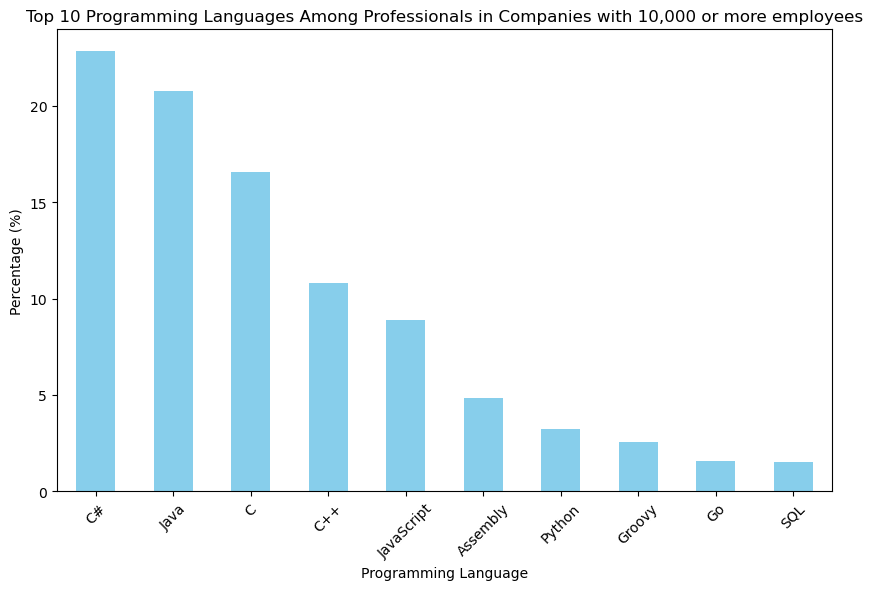

In [87]:
# Filter the DataFrame to select rows where 'CompanySize' is 'more than 10000 employees'.
employees_10k_to_more = company_languages[company_languages['CompanySize'] == '10,000 or more employees']

# Extract the 'HaveWorkedLanguage' column from the filtered DataFrame.
languages_worked_10k_to_more = employees_10k_to_more['HaveWorkedLanguage']

# Count the number of professionals who have worked with each programming language.
language_counts_10k_to_more = languages_worked_10k_to_more.value_counts()

# Calculate the total number of respondents in this company size category.
total_respondents_10k_to_more = len(employees_10k_to_more)

# Calculate the percentage of professionals who have worked with each language in this category.
language_percentages_10k_to_more = (language_counts_10k_to_more / total_respondents_10k_to_more) * 100

# Display the top programming languages and their respective percentages in this company size category.
top_languages_10k_to_more = language_percentages_10k_to_more.head(10)

# Print the results for analysis.
print("Top 10 Programming Languages Among Professionals in Companies with 10,000 or more employees:")
print(top_languages_10k_to_more)

plt.figure(figsize=(10, 6))
top_languages_10k_to_more.plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages Among Professionals in Companies with 10,000 or more employees')
plt.xlabel('Programming Language')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()